## CLUSTERING CUSTOMER INTO TWO STATUS.


In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
pd.set_option('display.max_columns', None)

from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.manifold import TSNE
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [5]:
# Reading dataset.
df = pd.read_csv('customer-churn-processed.csv')
df.head()

,Gender,Age,Tenure in Months,Phone Service,Multiple Lines,Internet Service,Internet Type,Online Security,Device Protection Plan,Premium Tech Support,Streaming TV,Streaming Movies,Streaming Music,Unlimited Data,Contract,Payment Method,Monthly Charge,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Customer Status
0,0,1,10.423196,1,0,1,0,0,0,1,1,0,0,1,1,1,65.6,0.00,0.0,381.51,974.81,0
1,1,1,22.475708,1,1,1,0,0,0,0,0,1,1,0,0,1,-4.0,38.33,10.0,96.21,610.28,0
2,1,1,4.000000,1,0,1,2,0,1,0,0,0,0,1,0,0,73.9,0.00,0.0,134.60,415.45,1
3,1,2,13.000000,1,0,1,2,0,1,0,1,1,0,1,0,0,98.0,0.00,0.0,361.66,1599.51,1
4,0,2,3.000000,1,0,1,2,0,0,1,1,0,0,1,0,1,83.9,0.00,0.0,22.14,289.54,1


In [6]:
x = df.drop('Customer Status', axis=1)
status = df['Customer Status']

### KMEANS clustering.

In [57]:
pca = PCA(n_components=10, random_state=23, svd_solver='arpack').fit(x)
pca.explained_variance_

array([8.59229259e+06, 2.86192821e+05, 6.78117266e+02, 6.18623592e+02,
       8.78936051e+01, 6.51320141e+01, 5.27406518e-01, 4.59621828e-01,
       3.25495544e-01, 3.01828624e-01])

In [58]:
model = KMeans(n_clusters=2, random_state=23, n_init='auto', tol=0.0001)
xs = x[['Contract', 'Tenure in Months',]]

pipe = Pipeline(steps=[('scaler', MinMaxScaler()),
                       ('pca', PCA(n_components=4, random_state=23)),
                        ('kmeans', model)])
pipe.fit(x)

labels = pipe['kmeans'].labels_


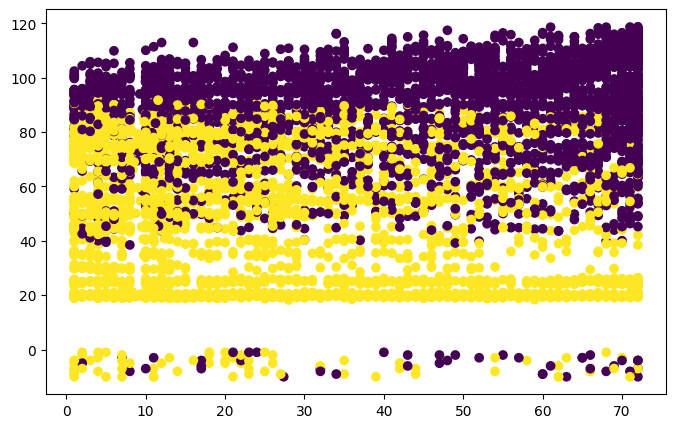

In [59]:
plt.figure(figsize=(8,5))
plt.scatter(x.loc[:,'Tenure in Months'], x.loc[:,'Monthly Charge'], c=labels)
plt.show()


In [60]:
label_df = pd.DataFrame({'labels': labels, 'status':status})
ct = pd.crosstab(label_df['labels'], label_df['status'])
print(ct)

status     0     1
labels            
0       2271   834
1       2449  1035


In [99]:
transformed_x = MinMaxScaler()
transformed_x.fit(xs)
x_trans = transformed_x.transform(xs)

### HEIRACHICAL Clusterng.

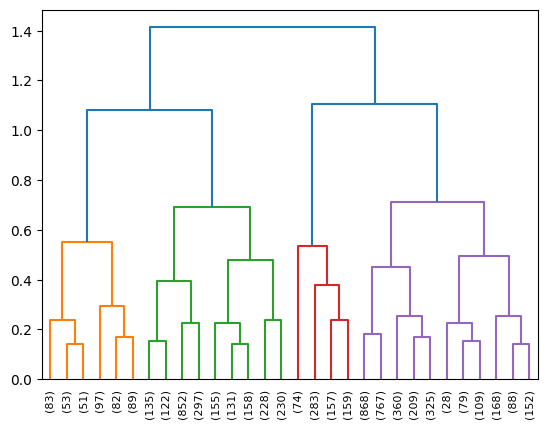

In [100]:
mergins = linkage(x_trans, method='complete')
dendrogram(mergins, labels=status, leaf_rotation=90, leaf_font_size=8, truncate_mode='lastp', distance_sort=True)
plt.show()

In [102]:
labelz = fcluster(mergins, 1, criterion='distance')

trt = pd.DataFrame({'labels':labelz, 'status':status, 'Truth': status == labelz})
trt['Truth'].value_counts()


Truth
False    6425
True      164
Name: count, dtype: int64